In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the libraries

%matplotlib inline
import numpy as np
import regionmask
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import xcdat as xc
import xarray as xr
import netCDF4
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [3]:
from scipy import stats

In [4]:
import seaborn as sns

In [5]:
mpl.rcParams['font.family'] = 'Droid Sans'
mpl.rcParams['font.size'] = 12
# Edit axes parameters
mpl.rcParams['axes.linewidth'] = 1.5
# Tick properties
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.direction'] = 'out'

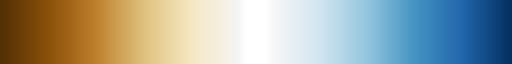

In [6]:
n = 35
diff = 0.5
cmap = plt.cm.BrBG
cmap2 = plt.cm.RdBu
lower = cmap(np.linspace(0, diff, n))
white = np.ones((2, 4))
upper = cmap2(np.linspace(1-diff, 1, n))
colors = np.vstack((lower, white, white, upper))
BrBU = mpl.colors.LinearSegmentedColormap.from_list('map_white', colors)
BrBU

In [7]:
raw = xr.open_dataset('./data/result/raw.nc')
raw

<xarray.Dataset>
Dimensions:  (time: 1380, region: 46, model: 52)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-16T12:00:00 ... 2014-12-16T12:00:00
  * region   (region) int64 0 1 2 3 4 5 6 7 8 9 ... 37 38 39 40 41 42 43 44 45
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'obs' 'rean'
Data variables:
    precip   (time, region, model) float64 ...
    nino     (time, region, model) float64 ...
    dmi      (time, region, model) float64 ...

In [8]:
out = xr.open_dataset('./data/result/out_conc.nc')

In [9]:
out['enc'] = out.nino - out.neut
out['lnc'] = out.nina - out.neut
out['asymm'] = (out.enc + out.lnc)/2
out['symm'] = (out.enc - out.lnc)/2

In [10]:
out['asymm_pval'] = xr.where((out.enc_pval > 0.05) & (out.lnc_pval > 0.05), 0, 1)

In [11]:
out

<xarray.Dataset>
Dimensions:      (model: 52, region: 46, season: 5)
Coordinates:
  * model        (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'obs' 'rean'
  * region       (region) object 'Greenland/Iceland' ... 'W.Antarctica'
  * season       (season) object 'ANN' 'DJF' 'MAM' 'JJA' 'SON'
Data variables: (12/18)
    std_dev      (model, region, season) float64 ...
    clim         (model, region, season) float64 ...
    corr_coef    (model, region, season) float64 ...
    pval         (model, region, season) float64 ...
    nino         (model, region, season) float64 ...
    nina         (model, region, season) float64 ...
    ...           ...
    threshold    (model) float64 ...
    enc          (model, region, season) float64 0.3218 0.01204 ... 0.02449
    lnc          (model, region, season) float64 -0.09092 -0.1126 ... -0.08654
    asymm        (model, region, season) float64 0.1155 -0.05029 ... -0.03103
    symm         (model, region, season) float64 0.2064 0.06233 ... 0.05551
    asymm_pval   (model, region, season) int64 0 0 0 0 0 1 1 0 ... 0 0 0 0 1 0 0

## effect of model resolution

In [12]:
import pandas as pd

In [13]:
model_res = pd.read_csv('./util/model_res_table_updated.csv')

In [14]:
model_res

,model,natNomRes atmos,natNomRes Ocean,native_atmos_grid_lon,native_atmos_grid_lat,area_at_equator
0,ACCESS-CM2,250,100,1.9,1.3,30432.87
1,ACCESS-ESM1-5,250,100,1.9,1.3,30432.87
2,AWI-CM-1-1-MR,100,25,0.9,0.9,9980.01
3,AWI-ESM-1-1-LR,250,50,1.9,1.9,44478.81
4,BCC-CSM2-MR,100,50,1.1,1.1,14908.41
5,BCC-ESM1,250,50,2.8,2.8,96596.64
6,CAMS-CSM1-0,100,100,1.1,1.1,14908.41
7,CAS-ESM2-0,100,100,1.4,1.4,24149.16
8,CESM2,100,100,1.3,0.9,14415.57
9,CESM2-FV2,250,100,2.5,1.9,58524.75


In [15]:
out.isel(region=37)

<xarray.Dataset>
Dimensions:      (model: 52, season: 5)
Coordinates:
  * model        (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'obs' 'rean'
    region       <U6 'S.Asia'
  * season       (season) object 'ANN' 'DJF' 'MAM' 'JJA' 'SON'
Data variables: (12/18)
    std_dev      (model, season) float64 ...
    clim         (model, season) float64 ...
    corr_coef    (model, season) float64 ...
    pval         (model, season) float64 ...
    nino         (model, season) float64 ...
    nina         (model, season) float64 ...
    ...           ...
    threshold    (model) float64 ...
    enc          (model, season) float64 -0.8625 0.1713 ... -0.3701 -0.1054
    lnc          (model, season) float64 -0.2094 -0.492 -0.2362 ... 0.2451 0.234
    asymm        (model, season) float64 -0.5359 -0.1604 ... -0.0625 0.0643
    symm         (model, season) float64 -0.3266 0.3317 ... -0.3076 -0.1697
    asymm_pval   (model, season) int64 1 1 1 1 1 1 0 1 1 1 ... 1 0 1 1 1 0 0 1 1

In [16]:
corr_bias = np.abs(out.isel(model=slice(0, -2), region=39, season=0).corr_coef - out.isel(model=-2, region=39, season=0).corr_coef)
asymm_bias = np.abs(out.isel(model=slice(0, -2), region=39, season=0).asymm - out.isel(model=-2, region=39, season=0).asymm)

PearsonRResult(statistic=0.06362603712105099, pvalue=0.6606833350301828)

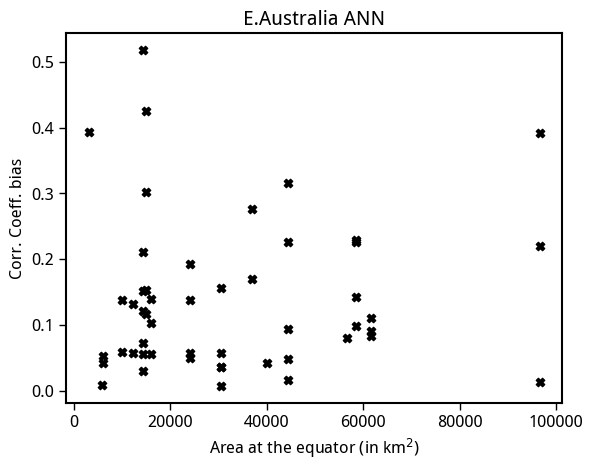

In [17]:
plt.scatter(model_res['area_at_equator'], corr_bias, marker='X', color='k')
plt.ylabel('Corr. Coeff. bias')
plt.xlabel('Area at the equator (in km$^{2}$)')
plt.title('E.Australia ANN')
stats.pearsonr(model_res['area_at_equator'], corr_bias)

PearsonRResult(statistic=0.1577228833661153, pvalue=0.27398771560743207)

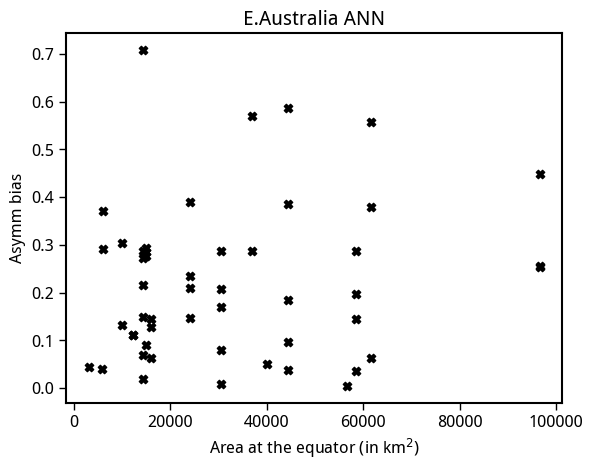

In [18]:
plt.scatter(model_res['area_at_equator'], asymm_bias, marker='X', color='k')
plt.ylabel('Asymm bias')
plt.xlabel('Area at the equator (in km$^{2}$)')
plt.title('E.Australia ANN')
stats.pearsonr(model_res['area_at_equator'], asymm_bias)

In [20]:
####
from dateutil.relativedelta import relativedelta

def reorder(da):
    da['time'] = pd.date_range('1900-01-01', '2015-01-01', freq='1M')

    custom = da.sel(time=da.time.dt.month.isin([6,7,8,9,10,11,12,1,2,3,4,5]))
    # convert cftime to datetime
    datetimeindex = custom.indexes['time']#.to_datetimeindex() 
    # custom['time'] = pd.to_datetime(datetimeindex)
    
    # Add custom group by year functionality
    custom_year = custom['time'].dt.year
    
    # convert time type to pd.Timestamp
    time1 = [pd.Timestamp(i) for i in custom_year['time'].values] 
    # time1 = [pd.Timestamp(i) for i in custom_year['time'].values] 
    
    # Add year to Timestamp objects when month is before Jan. (relativedelta does not work from np.datetime64)
    time2 = [i + relativedelta(years=1) if i.month>=6 else i for i in time1] 
    custom['time'] = time2
    return custom

####


def calc_anom(
    input_da,
    base_start_date: str = "1960-01-01",
    base_end_date: str = "1990-01-01",
    start_year: str = "1900-01-01",
    end_year: str = "2015-01-01",
    # var = "Temperature",
    # units = 'K'
):

    # define the base climatology
    base_clim = input_da.sel(time=slice(base_start_date, base_end_date))

    # calculate the monthly climatology for the base years
#     da_clim_coarsen = base_clim.coarsen(time=12)
    da_clim = base_clim.groupby("time.month").mean("time")
    da_anom = input_da.sel(time = slice(start_year, end_year)).groupby("time.month") - da_clim
    
    return da_anom

####

In [21]:
# Function to preprocess the regridded data

from statsmodels.tsa.seasonal import STL
# import pymannkendall as mk

def detrend1d(arr, period = 9*12):
    res = STL(arr, period = period).fit()
    arr_det = arr - res.trend
    return arr_det
    
def detrend1d_check(arr, period = 9):
    # if np.nansum(arr) != 0:
    #     trend = mk.hamed_rao_modification_test(arr).trend
    # else:
    #     trend = 'no trend'
    # if trend != 'no trend':
    #     res = STL(arr, period = period).fit()
    #     arr_det = arr - res.trend
    #     return arr_det
    # else:
    #     return arr
    res = STL(arr, period = period).fit()
    arr_det = arr - res.trend
    return arr_det

# def detrend_separate(da, period=9):
#     trend = da.rolling(time = period*12).mean('time')
#     da_detrend = da - trend
#     return da_detrend
def detrend_separate(da, dim):
    return xr.apply_ufunc(detrend1d, da, input_core_dims=[[dim]], output_core_dims=[[dim]])
    
def detrend_separate_check(da, dim):
    return xr.apply_ufunc(detrend1d_check, da, input_core_dims=[[dim]], output_core_dims=[[dim]])

In [22]:
from scipy import stats

In [23]:
skw_res = xr.open_dataset('./data/result/skw.nc')

In [24]:
# find high res and low res models
model_res[model_res['area_at_equator'] == np.min(model_res['area_at_equator'])]

,model,natNomRes atmos,natNomRes Ocean,native_atmos_grid_lon,native_atmos_grid_lat,area_at_equator
15,CNRM-CM6-1-HR,100,25,0.5,0.5,3080.25


In [25]:
model_res[model_res['area_at_equator'] == np.max(model_res['area_at_equator'])]

,model,natNomRes atmos,natNomRes Ocean,native_atmos_grid_lon,native_atmos_grid_lat,area_at_equator
5,BCC-ESM1,250,50,2.8,2.8,96596.64
17,CanESM5,500,100,2.8,2.8,96596.64
37,MIROC-ES2L,500,100,2.8,2.8,96596.64


In [26]:
pra_obs = calc_anom(raw.isel(model = -2, region=41).precip)
skw_obs = skw_res.isel(region = 41).sel(season='ANN', model='obs').pr_skw
asymm_obs = out.isel(region=41).sel(season='ANN', model='obs').asymm
prd_obs = detrend_separate_check(reorder(pra_obs).groupby('time.year').mean('time'), dim='year').sel(year = slice('1900', '2015'))

In [27]:
pra_hr = calc_anom(raw.isel(region=41).sel(model = 'CNRM-CM6-1-HR').precip)
skw_hr = skw_res.isel(region = 41).sel(model = 'CNRM-CM6-1-HR', season='ANN').pr_skw
asymm_hr = out.isel(region=41).sel(model = 'CNRM-CM6-1-HR', season='ANN').asymm
prd_hr = detrend_separate_check(reorder(pra_hr).groupby('time.year').mean('time'), dim='year').sel(year = slice('1900', '2015'))

In [28]:
pra_lr = calc_anom(raw.isel(region=41).sel(model = 'BCC-ESM1').precip)
skw_lr = skw_res.isel(region = 41).sel(model = 'BCC-ESM1', season='ANN').pr_skw
asymm_lr = out.isel(region=41).sel(model = 'BCC-ESM1', season='ANN').asymm
prd_lr = detrend_separate_check(reorder(pra_lr).groupby('time.year').mean('time'), dim='year').sel(year = slice('1900', '2015'))

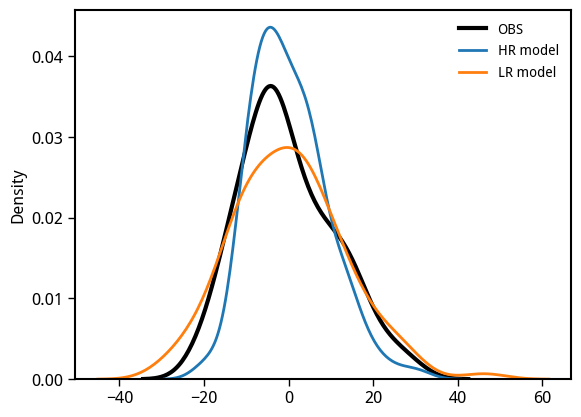

In [29]:
sns.kdeplot(prd_obs, lw = 3.0, label = 'OBS', color='k')
sns.kdeplot(prd_hr, lw = 2.0, label = 'HR model')
# sns.kdeplot(prd_hr2, lw = 2.0, label = 'HR model 2')
# sns.kdeplot(prd_hr2, lw = 2.0, label = 'HR model')
sns.kdeplot(prd_lr, lw = 2.0, label = 'LR model')
plt.legend(frameon=False, fontsize=10)

In [30]:
skw_obs.values, skw_hr.values, skw_lr.values

(array(0.47465978), array(0.65148446), array(0.40844375))

In [31]:
asymm_obs.values, asymm_hr.values, asymm_lr.values

(array(0.49228247), array(0.19304193), array(0.33113288))

In [32]:
# for all regions

In [33]:
def get_pearson_corr(x, y):
    res = stats.pearsonr(x, y)
    return res.statistic


def get_pearson_pval(x, y):
    res = stats.pearsonr(x, y)
    return res.pvalue


def corr_along_dim(da1, da2,  dim):
    return xr.apply_ufunc(get_pearson_corr, da1, da2, input_core_dims=[[dim], [dim]], vectorize=True, dask='parallelized')


def pval_along_dim(da1, da2,  dim):
    return xr.apply_ufunc(get_pearson_pval, da1, da2, input_core_dims=[[dim], [dim]], vectorize=True, dask='parallelized')

In [34]:
skw_bias = np.abs(skw_res.isel(model=slice(0, -2), region=slice(0, -2)) - skw_res.isel(model = -2, region=slice(0, -2))).pr_skw
asymm_bias = np.abs(out.isel(model=slice(0, -2), region=slice(0, -2)) - out.isel(model = -2, region=slice(0, -2))).asymm

In [35]:
model_res_da = model_res.set_index('model').to_xarray()['area_at_equator']
model_res_da

<xarray.DataArray 'area_at_equator' (model: 50)>
array([30432.87, 30432.87,  9980.01, 44478.81, 14908.41, 96596.64,
       14908.41, 24149.16, 14415.57, 58524.75, 14415.57, 58524.75,
       14415.57, 14415.57, 24149.16,  3080.25, 24149.16, 96596.64,
       12321.  , 12321.  ,  6037.29,  6037.29, 14908.41, 16017.3 ,
       56676.6 , 16017.3 , 16017.3 , 61605.  , 61605.  , 61605.  ,
       30432.87,  5914.08, 44478.81, 36963.  , 36963.  , 40043.25,
       30432.87, 96596.64, 24149.16, 44478.81,  9980.01, 44478.81,
       14908.41, 44478.81, 58524.75, 58524.75, 14415.57, 14415.57,
       14415.57, 30432.87])
Coordinates:
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'

In [36]:
corr_modelres_skw = corr_along_dim(model_res_da, skw_bias, 'model')
pval_modelres_skw = pval_along_dim(model_res_da, skw_bias, 'model')

corr_modelres_asymm = corr_along_dim(model_res_da, asymm_bias, 'model')
pval_modelres_asymm = pval_along_dim(model_res_da, asymm_bias, 'model')

In [40]:
def plot_heatmap(da_var, da_pval, var, pval_var, vmin, vmax, cmap, cbar_label='Corr Coef.'):
    df_var = da_var.to_dataset(name=var).to_dataframe().pivot_table(values=var, index='region', columns='season')
    df_pval = da_pval.to_dataset(name=pval_var).to_dataframe().pivot_table(values=pval_var, index='region', columns='season')
    sns.heatmap(df_var, cmap=cmap, vmin=vmin, vmax=vmax, linewidths=1.0, linecolor='white', cbar_kws={"shrink": 0.5, "pad": 0.02, "label": cbar_label, "extend":'both', })
    # plotting sign
    zm = np.ma.masked_greater_equal(df_pval.values, 0.05)
    x, y, = np.arange(len(df_pval.columns) + 1), np.arange(len(df_pval.index) + 1)
    plt.pcolor(x, y, zm, hatch='////', alpha=0.)

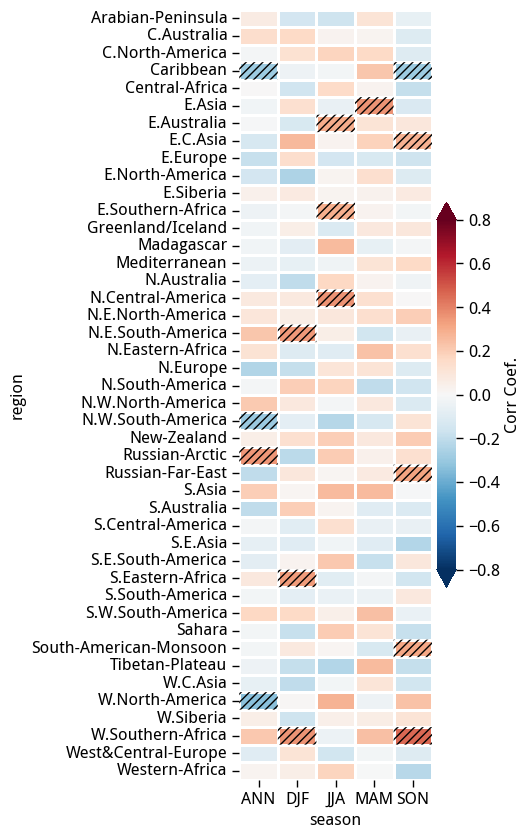

In [41]:
plt.figure(figsize=(3,10))
plot_heatmap(corr_modelres_skw, pval_modelres_skw, 'corr_skw', 'pval_skw', vmin=-0.8, vmax=0.8, cmap='RdBu_r')
plt.savefig('./images/review_extra/model_res_skw_corr.png', dpi=300, bbox_inches='tight')

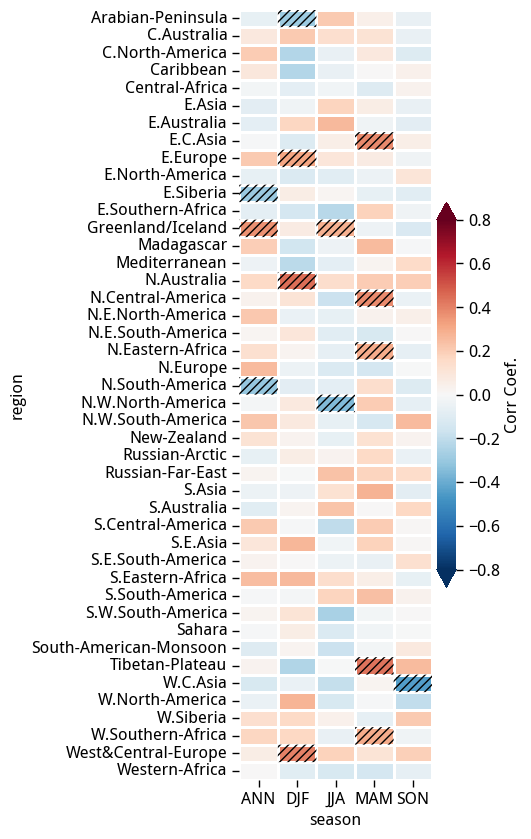

In [42]:
plt.figure(figsize=(3,10))
plot_heatmap(corr_modelres_asymm, pval_modelres_asymm, 'corr_asymm', 'pval_asymm', vmin=-0.8, vmax=0.8, cmap='RdBu_r')
plt.savefig('./images/review_extra/model_res_asymm_corr.png', dpi=300, bbox_inches='tight')

##### using a HR and LR model to compare the effects of downscaling -> HadGEM3-GC31-MM and CNRM-CM6-1-HR [checking the effect on rainfall distribution]

In [43]:
model_res.sort_values('area_at_equator')

,model,natNomRes atmos,natNomRes Ocean,native_atmos_grid_lon,native_atmos_grid_lat,area_at_equator
15,CNRM-CM6-1-HR,100,25,0.5,0.5,3080.25
31,HadGEM3-GC31-MM,100,25,0.8,0.6,5914.08
20,EC-Earth3,100,100,0.7,0.7,6037.29
21,EC-Earth3-Veg,100,100,0.7,0.7,6037.29
40,MPI-ESM1-2-HR,100,50,0.9,0.9,9980.01
2,AWI-CM-1-1-MR,100,25,0.9,0.9,9980.01
18,E3SM-1-1,100,50,1.0,1.0,12321.00
19,E3SM-1-1-ECA,100,50,1.0,1.0,12321.00
8,CESM2,100,100,1.3,0.9,14415.57
10,CESM2-WACCM,100,100,1.3,0.9,14415.57


In [44]:
def preproc_non_regridded(file_location):
    variants_used = ['r1i1p1f1', 'r1i1p1f2' 'r1i1p1f3']
    # sst = xr.open_mfdataset(f'{file_location}')#.load()
    precip = xr.open_mfdataset(f'{file_location}')#.load()

    # sst_anom, sst_base = calc_anom(sst.tos)
    # nino_anom = sst_anom.sel(lat = slice(-5, 5), lon = slice(-170, -120)).mean(('lat', 'lon'))
    # anom_wio = sst_anom.sel(lat = slice(-10, 10), lon = slice(50, 70)).mean(["lat", "lon"])
    # anom_eio = sst_anom.sel(lat = slice(-10, 0), lon = slice(90, 110)).mean(["lat", "lon"])
    # dmi = anom_wio - anom_eio

    # detrending
    # precip_anom_resid = detrend_separate(precip_anom)
    # nino34 = detrend_separate(nino_anom.load(), 'time').rolling(time=3).mean('time')
    # threshold = nino34.std('time')
    # sst_anom_resid = detrend_separate(sst_anom)
    
    # load the data into memory
    precip_mon = (precip.pr*86400*30).sel(time = slice('1900-01-01', '2015-01-01')).load()
    # precip_mon['time'] = nino34['time']
    # dmi = dmi.load()
    # rename stuff
    precip_mon.name = 'precip'
    # nino34.name = 'nino'
    # dmi.name = 'dmi'
    precip_mon = precip_mon.sel(time = slice('1900', '2015'))
    precip_mon = precip_mon.assign_coords({"lon": (((precip_mon.lon + 180) % 360) - 178.5)})
    precip_mon = precip_mon.sortby(precip_mon.lon)
    land_mask = regionmask.defined_regions.natural_earth_v5_0_0.land_10.mask_3D(precip_mon, wrap_lon=False, drop=True)
    precip_land = precip_mon.where(land_mask.isel(region=0))
    return precip_land

In [45]:
precip_land = preproc_non_regridded('/g/data/oi10/replicas/CMIP6/CMIP/CCCma/CanESM5/historical/r1i1p1f1/Amon/pr/gn/v20190429/pr_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc')
# precip_land = preproc_non_regridded('/g/data/oi10/replicas/CMIP6/CMIP/MOHC/HadGEM3-GC31-MM/historical/r1i1p1f3/Amon/pr/gn/v20191207/*.nc')
# precip_land = preproc_non_regridded('/g/data/oi10/replicas/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1-HR/historical/r1i1p1f2/Amon/pr/gr/v20191021/*.nc')

In [46]:
region_index=41

In [47]:
ar6_mask = regionmask.defined_regions.ar6.land.mask_3D(precip_land, wrap_lon=False, drop=False)
precip_region = precip_land.where(ar6_mask.isel(region=region_index))
weights = np.cos(np.deg2rad(precip_region.lat))
weights.name = 'weights'
# reorder the vars
precip_region_mean = precip_region.weighted(weights).mean(('lat', 'lon'))

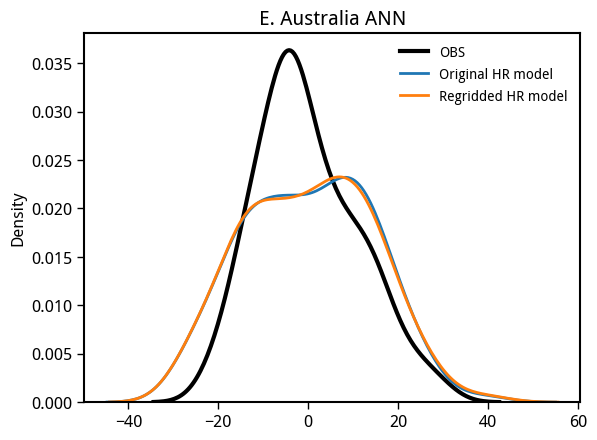

In [48]:
obs_dist = detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=region_index).sel(model = 'obs'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015'))
regrid_dist = detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=41).sel(model = 'CanESM5'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015'))
# regrid_dist = detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=41).sel(model = 'HadGEM3-GC31-MM'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015'))
# regrid_dist = detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=region_index).sel(model = 'CNRM-CM6-1-HR'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015'))
orig_dist = detrend_separate_check(reorder(calc_anom(precip_region_mean)).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015'))

sns.kdeplot(obs_dist, color='k', lw=3.0, label = 'OBS')
sns.kdeplot(orig_dist, lw=2.0, label='Original HR model')
sns.kdeplot(regrid_dist, lw=2.0, label = 'Regridded HR model')
plt.title('E. Australia ANN')
plt.legend(frameon=False, fontsize=10)

In [73]:
orig_dists = np.empty((len(out.isel(region=slice(0,-2)).region), len(obs_dist)))
regr_dists = np.empty((len(out.isel(region=slice(0,-2)).region), len(obs_dist)))
obs_dists = np.empty((len(out.isel(region=slice(0,-2)).region), len(obs_dist)))
for i in range(len(out.isel(region=slice(0,-2)).region)):
    # precip_land = preproc_non_regridded('/g/data/oi10/replicas/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1-HR/historical/r1i1p1f2/Amon/pr/gr/v20191021/*.nc')
    # precip_land = preproc_non_regridded('/g/data/oi10/replicas/CMIP6/CMIP/MOHC/HadGEM3-GC31-MM/historical/r1i1p1f3/Amon/pr/gn/v20191207/*.nc')
    precip_land = preproc_non_regridded('/g/data/oi10/replicas/CMIP6/CMIP/CCCma/CanESM5/historical/r1i1p1f1/Amon/pr/gn/v20190429/pr_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc')
    ar6_mask = regionmask.defined_regions.ar6.land.mask_3D(precip_land, wrap_lon=False, drop=False)
    precip_region = precip_land.where(ar6_mask.isel(region=i))
    weights = np.cos(np.deg2rad(precip_region.lat))
    weights.name = 'weights'
    precip_region_mean = precip_region.weighted(weights).mean(('lat', 'lon'))
    # reorder the vars
    orig_dists[i, :] = detrend_separate_check(reorder(calc_anom(precip_region_mean)).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015')).to_numpy()
    obs_dists[i, :] = detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=i).sel(model = 'obs'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015'))
    # lr_dists[i, :] = detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=i).sel(model = 'CNRM-CM6-1-HR'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015'))
    # regr_dists[i, :] = detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=i).sel(model = 'HadGEM3-GC31-MM'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015'))
    regr_dists[i, :] = detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=i).sel(model = 'CanESM5'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015'))
    print(f'Completed {i}/44')

Completed 0/44
Completed 1/44
Completed 2/44
Completed 3/44
Completed 4/44
Completed 5/44
Completed 6/44
Completed 7/44
Completed 8/44
Completed 9/44
Completed 10/44
Completed 11/44
Completed 12/44
Completed 13/44
Completed 14/44
Completed 15/44
Completed 16/44
Completed 17/44
Completed 18/44
Completed 19/44
Completed 20/44
Completed 21/44
Completed 22/44
Completed 23/44
Completed 24/44
Completed 25/44
Completed 26/44
Completed 27/44
Completed 28/44
Completed 29/44
Completed 30/44
Completed 31/44
Completed 32/44
Completed 33/44
Completed 34/44
Completed 35/44
Completed 36/44
Completed 37/44
Completed 38/44
Completed 39/44
Completed 40/44
Completed 41/44
Completed 42/44
Completed 43/44


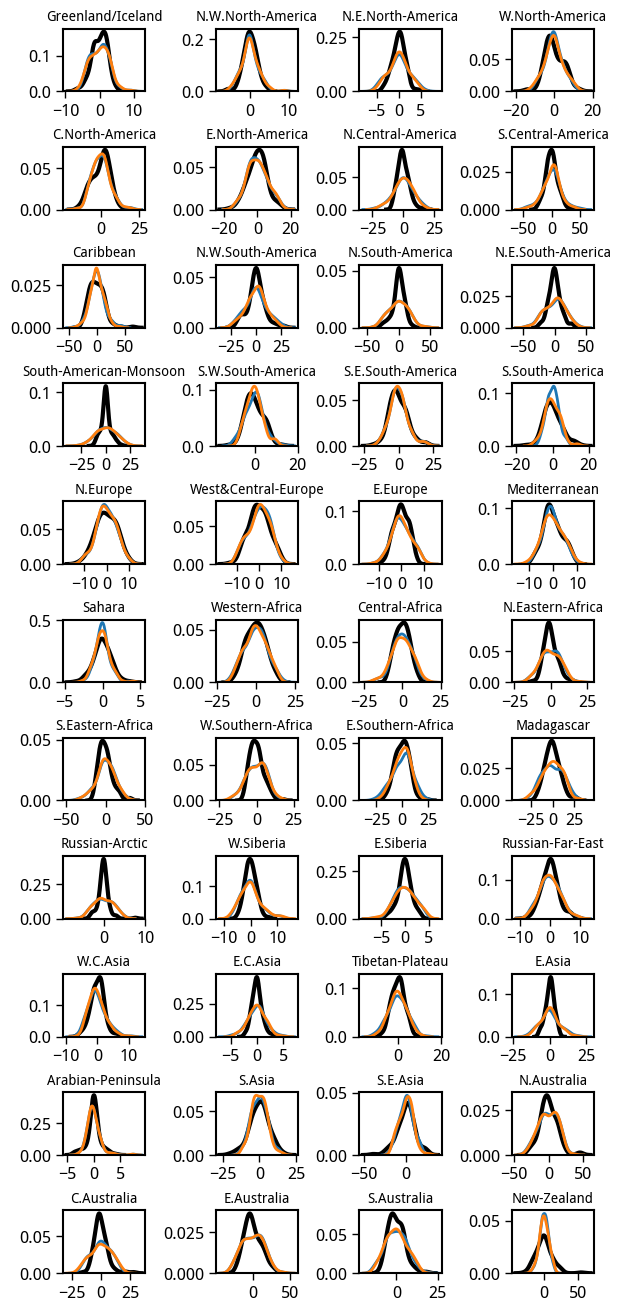

In [74]:
fig, axarr = plt.subplots(nrows=11, ncols=4, figsize=(6, 13), constrained_layout=True, sharey=False)
axlist = axarr.flatten()
for i in range(len(obs_dists)):
    sns.kdeplot(obs_dists[i], color='k', lw=3.0, label = 'OBS', ax=axlist[i])
    sns.kdeplot(orig_dists[i], lw=2.0, label='Original HR model', ax=axlist[i])
    sns.kdeplot(regr_dists[i], lw=2.0, label = 'Regridded HR model', ax=axlist[i])
    axlist[i].set_title(f'{out.isel(region=slice(0,-2)).region.to_numpy()[i]}', fontsize=10)
    axlist[i].set_ylabel('')
    # plt.legend(frameon=False, fontsize=10)
# plt.savefig('./images/review_extra/ann_hr_lr_cnrm_model.png', dpi=300, bbox_inches='tight')
plt.savefig('./images/review_extra/ann_orig_regrid_canesm5_lowres_model.png', dpi=300, bbox_inches='tight')

## ITCZ analysis

In [49]:
import os

In [50]:
model_names = []
for file in sorted(os.listdir('/g/data/ob22/as8561/data/regridded_models/'))[1:-4]:
    if '_pr' in file:
        model_names.append(file.split('_pr')[0])

In [51]:
access_pr = (xr.open_dataset('/g/data/ob22/as8561/data/regridded_models/ACCESS-ESM1-5_pr_r1i1p1f1/pr_Amon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc').pr*86400*30).sel(time = slice('1900', '2014'))
nesm3_pr = (xr.open_dataset('/g/data/ob22/as8561/data/regridded_models/NESM3_pr_r1i1p1f1/pr_Amon_NESM3_historical_r1i1p1f1_gn_185001-201412.nc').pr*86400*30).sel(time = slice('1900', '2014'))
miroc6_pr = (xr.open_mfdataset('/g/data/ob22/as8561/data/regridded_models/MIROC6_pr_r1i1p1f1/*.nc').pr*86400*30).sel(time = slice('1900', '2014')).load()
giss_pr = (xr.open_mfdataset('/g/data/ob22/as8561/data/regridded_models/GISS-E2-1-H_pr_r1i1p1f1/*.nc').pr*86400*30).sel(time = slice('1900', '2014')).load()
giss_pr2 = (xr.open_mfdataset('/g/data/ob22/as8561/data/regridded_models/GISS-E2-1-G-CC_pr_r1i1p1f1/*.nc').pr*86400*30).sel(time = slice('1900', '2014')).load()
iitm_pr = (xr.open_mfdataset('/g/data/ob22/as8561/data/regridded_models/IITM-ESM_pr_r1i1p1f1/*.nc').pr*86400*30).sel(time = slice('1900', '2014')).load()
casesm_pr = (xr.open_mfdataset('/g/data/ob22/as8561/data/regridded_models/CAS-ESM2-0_pr_r1i1p1f1/*.nc').pr*86400*30).sel(time = slice('1900', '2014')).load()
ukesm_pr = (xr.open_mfdataset('/g/data/ob22/as8561/data/regridded_models/UKESM1-0-LL_pr_r1i1p1f2/*.nc').pr*86400*30).sel(time = slice('1900', '2014')).load()
cnrm_pr = (xr.open_mfdataset('/g/data/ob22/as8561/data/regridded_models/CNRM-ESM2-1_pr_r1i1p1f2/*.nc').pr*86400*30).sel(time = slice('1900', '2014')).load()
hadgem_pr = (xr.open_mfdataset('/g/data/ob22/as8561/data/regridded_models/HadGEM3-GC31-MM_pr_r1i1p1f3/*.nc').pr*86400*30).sel(time = slice('1900', '2014')).load()
awi_esm_pr = (xr.open_mfdataset('/g/data/ob22/as8561/data/regridded_models/AWI-ESM-1-1-LR_pr_r1i1p1f1/*.nc').pr*86400*30).sel(time = slice('1900', '2014')).load()

In [52]:
rean_pr = (xr.open_mfdataset('./data/regridded/20CR/prate.mon.mean_regrid.nc').prate*86400*30).sel(time = slice('1900', '2014')).load()

In [53]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [54]:
obs = rean_pr.sel(lat=slice(-15, 15), lon = slice(-150+360, -90+360)).mean(('time', 'lon'))
pred = nesm3_pr.sel(lat=slice(-15, 15), lon = slice(-150+360, -90+360)).mean(('time', 'lon'))
pred_alt = miroc6_pr.sel(lat=slice(-15, 15), lon = slice(-150+360, -90+360)).mean(('time', 'lon'))
pred_alt2 = giss_pr2.sel(lat=slice(-15, 15), lon = slice(-150+360, -90+360)).mean(('time', 'lon'))

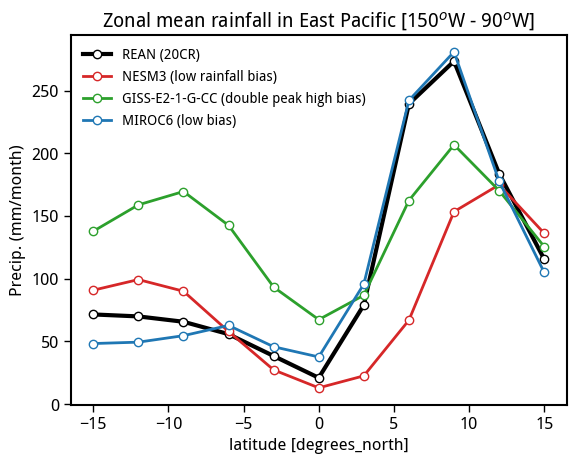

In [205]:
obs.plot(color='k', lw=3.0, marker='o', mfc='white', label='REAN (20CR)')
pred.plot(color='tab:red', lw=2.0, marker='o', mfc='white', label='NESM3 (low rainfall bias)')
pred_alt2.plot(color='tab:green', lw=2.0, marker='o', mfc='white', label='GISS-E2-1-G-CC (double peak high bias)')
pred_alt.plot(color='tab:blue', lw=2.0, marker='o', mfc='white', label='MIROC6 (low bias)')
plt.ylabel('Precip. (mm/month)')
plt.title('Zonal mean rainfall in East Pacific [150$^{o}$W - 90$^{o}$W]', fontsize=14)
plt.legend(frameon=False, fontsize=10)
plt.savefig('./images/review_extra/double_itcz_bias_method.png', dpi=300, bbox_inches='tight')

In [55]:
rean_nino_index = raw.nino.isel(model=-1, region=0).drop(('model', 'region'))
thresh = float(rean_nino_index.std('time'))
rean_pr['time'] = rean_nino_index['time']

In [56]:
import matplotlib.ticker as mticker

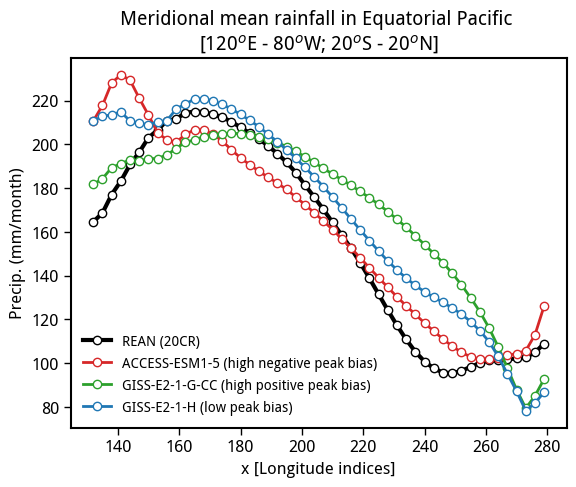

In [208]:
rean_pr.sel(lat = slice(-15, 15), lon = slice(120, -80+360)).mean(('time', 'lat')).rolling(lon=5).mean('lon').plot(color='k', lw=3.0, marker='o', mfc='white', label='REAN (20CR)')
access_pr.sel(lat = slice(-15, 15), lon = slice(120, -80+360)).mean(('time', 'lat')).rolling(lon=5).mean('lon').plot(color='tab:red', lw=2.0, marker='o', mfc='white', label='ACCESS-ESM1-5 (high negative peak bias)')
giss_pr2.sel(lat = slice(-15, 15), lon = slice(120, -80+360)).mean(('time', 'lat')).rolling(lon=5).mean('lon').plot(color='tab:green', lw=2.0, marker='o', mfc='white', label='GISS-E2-1-G-CC (high positive peak bias)')
giss_pr.sel(lat = slice(-15, 15), lon = slice(120, -80+360)).mean(('time', 'lat')).rolling(lon=5).mean('lon').plot(color='tab:blue', lw=2.0, marker='o', mfc='white', label='GISS-E2-1-H (low peak bias)')
# iitm_pr.sel(lat = slice(-15, 15), lon = slice(120, -80+360)).mean(('time', 'lat')).rolling(lon=5).mean('lon').plot(color='tab:green', lw=2.0, marker='o', mfc='white', label='IITM-ESM (low bias)')
# awi_esm_pr.sel(lat = slice(-20, 20), lon = slice(120, -80+360)).mean(('time', 'lat')).rolling(lon=5).mean('lon').plot(color='tab:green', lw=2.0, marker='o', mfc='white', label='AWI-ESM-1-1-LR (high bias)')
plt.ylabel('Precip. (mm/month)')
plt.xlabel('x [Longitude indices]')
plt.title('Meridional mean rainfall in Equatorial Pacific \n[120$^{o}$E - 80$^{o}$W; 20$^{o}$S - 20$^{o}$N]', fontsize=14)
plt.legend(frameon=False, fontsize=10)
plt.savefig('./images/review_extra/long_peak_method.png', dpi=300, bbox_inches='tight')

In [57]:
# test = rean_pr.sel(lat = slice(-15, 15), lon = slice(120, -80+360)).mean(('time', 'lat')).rolling(lon=5).mean('lon')
test = access_pr.sel(lat = slice(-15, 15), lon = slice(120, -80+360)).mean(('time', 'lat')).rolling(lon=5).mean('lon')
float(test.where(test == test.max(), drop=True).lon)

141.0

In [58]:
# test.where(test == test.max(), drop=True)
test

<xarray.DataArray 'pr' (lon: 54)>
array([         nan,          nan,          nan,          nan,
       210.71285575, 217.83141187, 228.16371988, 231.79393259,
       229.31620915, 221.05260579, 213.35949189, 205.28987318,
       202.07661979, 200.92669967, 204.56385205, 206.6448997 ,
       206.62334072, 204.6903526 , 201.57203294, 197.60719727,
       193.82161635, 190.71259535, 187.72659499, 184.99816688,
       182.30195263, 179.41701204, 175.93544699, 172.46359209,
       168.81461258, 165.04250188, 161.05408286, 156.93191419,
       152.6820085 , 148.19166931, 143.61410727, 139.11893859,
       134.67984213, 130.35284801, 126.23291106, 122.27122992,
       118.36006354, 114.62663336, 111.068709  , 107.76666712,
       104.97796078, 102.89960027, 101.83444058, 102.06401038,
       102.56717362, 103.59193396, 104.41780878, 105.68282517,
       112.99458814, 126.22399012])
Coordinates:
  * lon      (lon) float64 120.0 123.0 126.0 129.0 ... 270.0 273.0 276.0 279.0

In [59]:
obs1 = rean_pr.sel(lat = slice(-15, 15), lon = slice(120, -80+360)).mean(('time', 'lat')).rolling(lon=5).mean('lon')
pred1 = access_pr.sel(lat = slice(-15, 15), lon = slice(120, -80+360)).mean(('time', 'lat')).rolling(lon=5).mean('lon')

In [60]:
rmse(pred, obs)

<xarray.DataArray ()>
array(67.302053)

In [61]:
pred_peak = float(pred1.where(pred1 == pred1.max(), drop=True).lon) 
obs_peak = float(obs1.where(obs1 == obs1.max(), drop=True).lon)
peak_bias = pred_peak - obs_peak
peak_bias

-24.0

In [62]:
obs_peak, pred_peak

(165.0, 141.0)

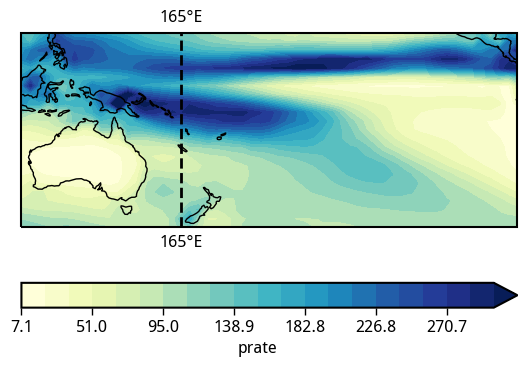

In [63]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
rean_pr.sel(lat = slice(-50, 20), lon = slice(110, -80+360)).mean('time').plot.contourf(cmap='YlGnBu', levels=21, vmax=300, transform=ccrs.PlateCarree(), extend='max', cbar_kwargs=dict(orientation='horizontal'))
gl = ax.gridlines(draw_labels=True, alpha=1., color='k', lw=2.0, ls='--')
# gl.xlocator = mticker.FixedLocator([168])
gl.xlocator = mticker.FixedLocator([obs_peak])
gl.ylocator = mticker.FixedLocator([])
ax.coastlines()

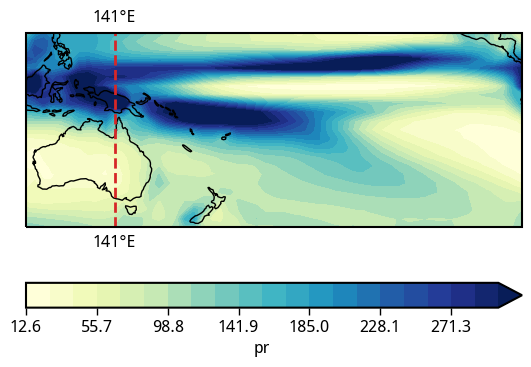

In [64]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
access_pr.sel(lat = slice(-50, 20), lon = slice(110, -80+360)).mean('time').plot.contourf(cmap='YlGnBu', levels=21, vmax=300, transform=ccrs.PlateCarree(), extend='max', cbar_kwargs=dict(orientation='horizontal'))
gl = ax.gridlines(draw_labels=True, alpha=1., color='tab:red', lw=2.0, ls='--')
# gl.xlocator = mticker.FixedLocator([141])
gl.xlocator = mticker.FixedLocator([pred_peak])
gl.ylocator = mticker.FixedLocator([])
ax.coastlines()

<AxesSubplot:ylabel='Density'>

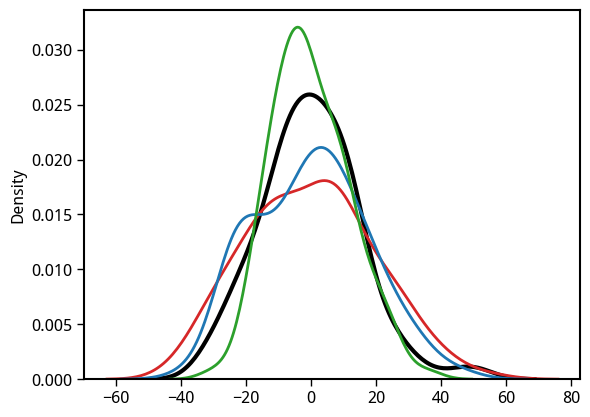

In [65]:
sns.kdeplot(detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=39).sel(model = 'rean'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015')), color='k', lw=3.0)
sns.kdeplot(detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=39).sel(model = 'ACCESS-ESM1-5'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015')), color='tab:red', lw=2.0)
sns.kdeplot(detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=39).sel(model = 'GISS-E2-1-H'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015')), color='tab:blue', lw=2.0)
sns.kdeplot(detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=39).sel(model = 'GISS-E2-1-G-CC'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015')), color='tab:green', lw=2.0)

In [145]:
metric = []
metric1 = []
i = 1
for model in model_names:
    model_pr = (xr.open_mfdataset(f'/g/data/ob22/as8561/data/regridded_models/{model}_pr_*/*.nc').pr*86400*30).load()
    pred = model_pr.sel(time = slice('1900', '2014'), lat=slice(-15, 15), lon = slice(-150+360, -90+360)).mean(('time', 'lon'))
    pred1 = model_pr.sel(time = slice('1900', '2014'), lat = slice(-15, 15), lon = slice(120, -80+360)).mean(('time', 'lat')).rolling(lon=5).mean('lon')
    pred_peak = float(pred1.where(pred1 == pred1.max(), drop=True).lon) 
    metric.append(float(rmse(pred, obs)))
    metric1.append(float(pred_peak - obs_peak))
    print(f'Completed {i}/{len(model_names)}', end='\r')
    i += 1

In [146]:
metric1

[-24.0,
 -24.0,
 -27.0,
 -33.0,
 -30.0,
 -27.0,
 0.0,
 -33.0,
 3.0,
 -15.0,
 -18.0,
 -15.0,
 -18.0,
 -18.0,
 -24.0,
 -3.0,
 0.0,
 0.0,
 -27.0,
 -27.0,
 -27.0,
 -27.0,
 -18.0,
 -18.0,
 -18.0,
 6.0,
 -9.0,
 -21.0,
 -9.0,
 -9.0,
 12.0,
 9.0,
 3.0,
 0.0,
 0.0,
 3.0,
 -21.0,
 -33.0,
 -21.0,
 3.0,
 -12.0,
 -3.0,
 -3.0,
 -27.0,
 -3.0,
 -6.0,
 -21.0,
 -15.0,
 3.0,
 -15.0,
 3.0,
 -27.0,
 0.0,
 0.0]

In [147]:
itcz_metric = pd.DataFrame(dict(model = model_names, double_itcz_bias=metric, long_peak = metric1))

In [149]:
# itcz_metric.to_csv('./util/itcz_metric.csv')

In [75]:
itcz_metric = pd.read_csv('./util/itcz_metric.csv').drop(columns=['Unnamed: 0'])

In [77]:
itcz_metric.sort_values('double_itcz_bias')

,model,double_itcz_bias,long_peak
42,MIROC6,13.316093,-3.0
34,HadGEM3-GC31-MM,19.841690,0.0
11,CESM2,21.614460,-15.0
38,IPSL-CM6A-LR,21.884055,-21.0
53,UKESM1-0-LL,22.585027,0.0
33,HadGEM3-GC31-LL,23.243501,0.0
14,CMCC-CM2-SR5,23.630145,-24.0
10,CESM2-WACCM,24.626792,-18.0
50,NorESM2-MM,25.978688,3.0
52,TaiESM1,26.590179,0.0


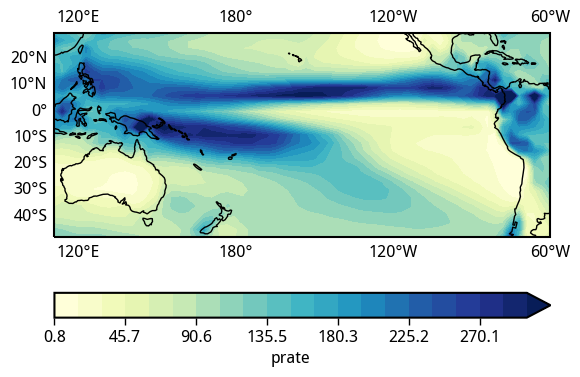

In [83]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
rean_pr.sel(lat = slice(-50, 30), lon = slice(110, -60+360)).mean('time').plot.contourf(cmap='YlGnBu', levels=21, vmax=300, transform=ccrs.PlateCarree(), extend='max', cbar_kwargs=dict(orientation='horizontal'))
gl = ax.gridlines(draw_labels=True, alpha=0., color='tab:red', lw=2.0, ls='--')
# gl.xlocator = mticker.FixedLocator([141])
# gl.xlocator = mticker.FixedLocator([pred_peak])
# gl.ylocator = mticker.FixedLocator([])
ax.coastlines()

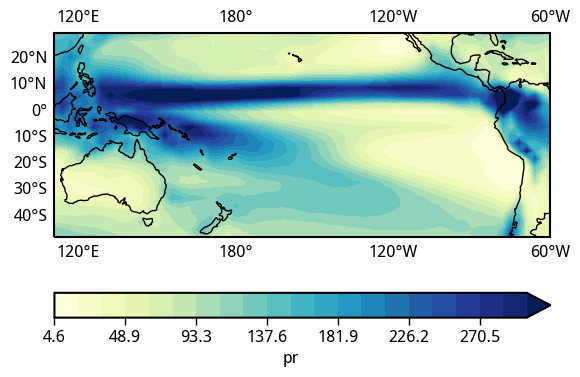

In [82]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
miroc6_pr.sel(lat = slice(-50, 30), lon = slice(110, -60+360)).mean('time').plot.contourf(cmap='YlGnBu', levels=21, vmax=300, transform=ccrs.PlateCarree(), extend='max', cbar_kwargs=dict(orientation='horizontal'))
gl = ax.gridlines(draw_labels=True, alpha=0., color='tab:red', lw=2.0, ls='--')
# gl.xlocator = mticker.FixedLocator([141])
# gl.xlocator = mticker.FixedLocator([pred_peak])
# gl.ylocator = mticker.FixedLocator([])
ax.coastlines()

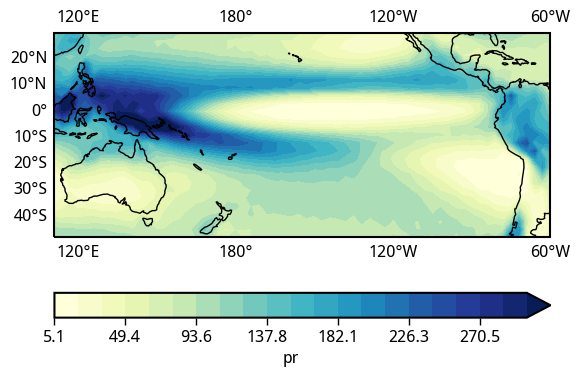

In [84]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
nesm3_pr.sel(lat = slice(-50, 30), lon = slice(110, -60+360)).mean('time').plot.contourf(cmap='YlGnBu', levels=21, vmax=300, transform=ccrs.PlateCarree(), extend='max', cbar_kwargs=dict(orientation='horizontal'))
gl = ax.gridlines(draw_labels=True, alpha=0., color='tab:red', lw=2.0, ls='--')
# gl.xlocator = mticker.FixedLocator([141])
# gl.xlocator = mticker.FixedLocator([pred_peak])
# gl.ylocator = mticker.FixedLocator([])
ax.coastlines()

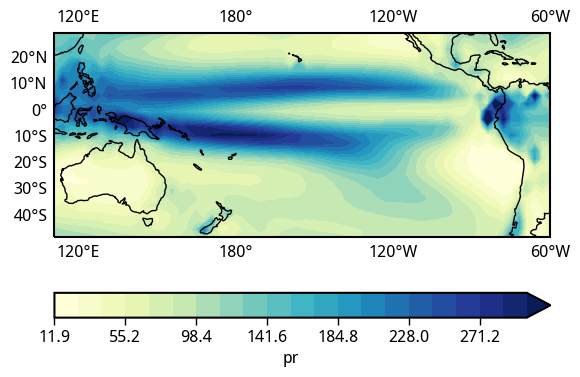

In [85]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
giss_pr2.sel(lat = slice(-50, 30), lon = slice(110, -60+360)).mean('time').plot.contourf(cmap='YlGnBu', levels=21, vmax=300, transform=ccrs.PlateCarree(), extend='max', cbar_kwargs=dict(orientation='horizontal'))
gl = ax.gridlines(draw_labels=True, alpha=0., color='tab:red', lw=2.0, ls='--')
# gl.xlocator = mticker.FixedLocator([141])
# gl.xlocator = mticker.FixedLocator([pred_peak])
# gl.ylocator = mticker.FixedLocator([])
ax.coastlines()

<AxesSubplot:ylabel='Density'>

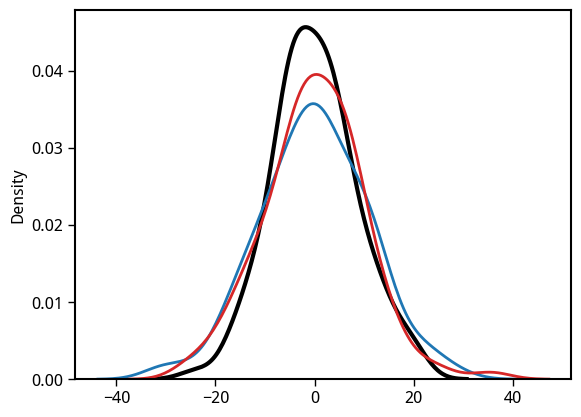

In [99]:
sns.kdeplot(detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=9).sel(model = 'rean'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015')), color='k', lw=3.0)
sns.kdeplot(detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=9).sel(model = 'MIROC6'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015')), color='tab:blue', lw=2.0)
sns.kdeplot(detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=9).sel(model = 'GISS-E2-1-G-CC'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015')), color='tab:red', lw=2.0)

In [106]:
stats.kurtosis(detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=9).sel(model = 'rean'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015'))), stats.kurtosis(detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=9).sel(model = 'MIROC6'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015'))), stats.kurtosis(detrend_separate_check(reorder(calc_anom(raw.precip.isel(region=9).sel(model = 'GISS-E2-1-G-CC'))).groupby('time.year').mean('time'), dim='year').sel(year=slice('1900', '2015')))

(0.061131854499740346, 0.16682881300521668, 0.8377980959761353)

In [238]:
asymm_bias_df = (out.isel(region=39, season=0, model=slice(0, -2)).asymm - out.isel(region=39, season=0, model=-2).asymm).drop(('region', 'season')).to_dataframe()
skw_bias_df = (skw_res.isel(region=39, season=0, model=slice(0, -2)).pr_skw - skw_res.isel(region=39, season=0, model=-2).pr_skw).drop(('region', 'season')).to_dataframe()

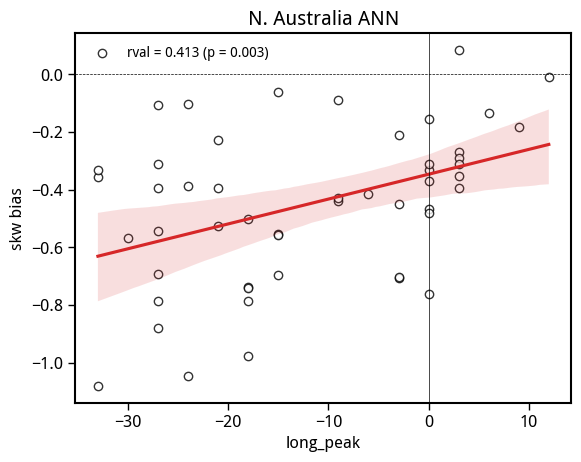

In [240]:
res = stats.pearsonr(itcz_metric.loc[itcz_metric['model'].isin(skw_bias_df.index)].long_peak, skw_bias_df.pr_skw)
sns.regplot(x=itcz_metric.loc[itcz_metric['model'].isin(skw_bias_df.index)].long_peak, y=skw_bias_df.pr_skw, color='k', marker='o', \
            scatter_kws=dict(facecolor='white'), line_kws=dict(color='tab:red'), \
            label = f'rval = {round(res.statistic, 3)} (p = {round(res.pvalue, 3)})')
# plt.ylim(-1.1, 0.8)
# plt.xlim(-50, 8)
plt.axhline(0.0, color='k', lw=0.5, ls='--')
plt.axvline(0.0, color='k', lw=0.5, ls='--')
plt.ylabel('skw bias')
plt.title('N. Australia ANN')
plt.legend(frameon=False, fontsize=10)
plt.savefig('./images/review_extra/long_peak_skw_naus_ann.png', dpi=300, bbox_inches='tight')

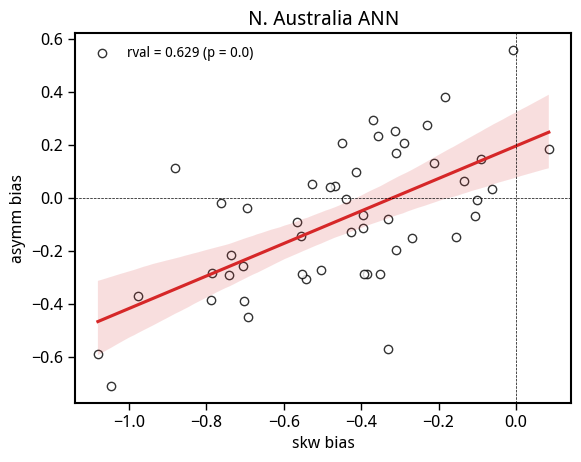

In [241]:
res = stats.pearsonr(skw_bias_df.pr_skw, asymm_bias_df.asymm)
# sns.regplot(x=itcz_metric.loc[itcz_metric['model'].isin(asymm_bias_df.index)].long_peak, y=asymm_bias_df.asymm, color='k', marker='x')
sns.regplot(x=skw_bias_df.pr_skw, y=asymm_bias_df.asymm, color='k', marker='o', \
            scatter_kws=dict(facecolor='white'), line_kws=dict(color='tab:red'), \
            label = f'rval = {round(res.statistic, 3)} (p = {round(res.pvalue, 3)})')
# plt.ylim(-1.1, 0.8)
# plt.xlim(-50, 8)
plt.axhline(0.0, color='k', lw=0.5, ls='--')
plt.axvline(0.0, color='k', lw=0.5, ls='--')
plt.ylabel('asymm bias')
plt.xlabel('skw bias')
plt.title('N. Australia ANN')
plt.legend(frameon=False, fontsize=10)
plt.savefig('./images/review_extra/skw_asymm_naus_ann.png', dpi=300, bbox_inches='tight')

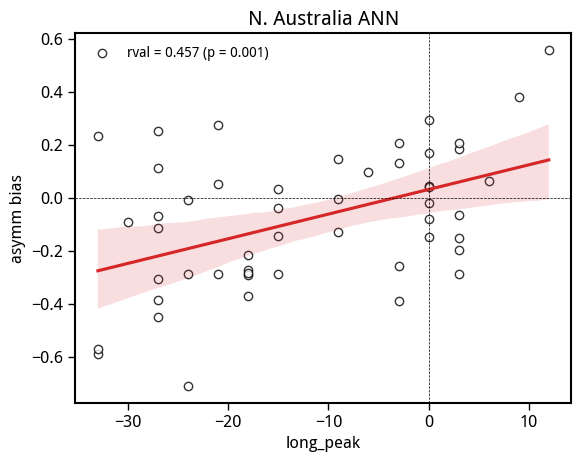

In [242]:
res = stats.pearsonr(itcz_metric.loc[itcz_metric['model'].isin(asymm_bias_df.index)].long_peak, asymm_bias_df.asymm)
sns.regplot(x=itcz_metric.loc[itcz_metric['model'].isin(asymm_bias_df.index)].long_peak, y=asymm_bias_df.asymm, color='k', marker='o', \
            scatter_kws=dict(facecolor='white'), line_kws=dict(color='tab:red'), \
            label = f'rval = {round(res.statistic, 3)} (p = {round(res.pvalue, 3)})')
# plt.ylim(-1.1, 0.8)
# plt.xlim(-50, 8)
plt.axhline(0.0, color='k', lw=0.5, ls='--')
plt.axvline(0.0, color='k', lw=0.5, ls='--')
plt.ylabel('asymm bias')
plt.title('N. Australia ANN')
plt.legend(frameon=False, fontsize=10)
plt.savefig('./images/review_extra/long_peak_asymm_naus_ann.png', dpi=300, bbox_inches='tight')

In [250]:
out.isel(region=7).region

<xarray.DataArray 'region' ()>
array('S.Central-America', dtype='<U17')
Coordinates:
    region   <U17 'S.Central-America'

In [94]:
asymm_bias_df = (out.isel(region=9, season=0, model=slice(0, -2)).asymm - out.isel(region=9, season=0, model=-2).asymm).drop(('region', 'season')).to_dataframe()
skw_bias_df = (skw_res.isel(region=9, season=0, model=slice(0, -2)).pr_skw - skw_res.isel(region=9, season=0, model=-2).pr_skw).drop(('region', 'season')).to_dataframe()

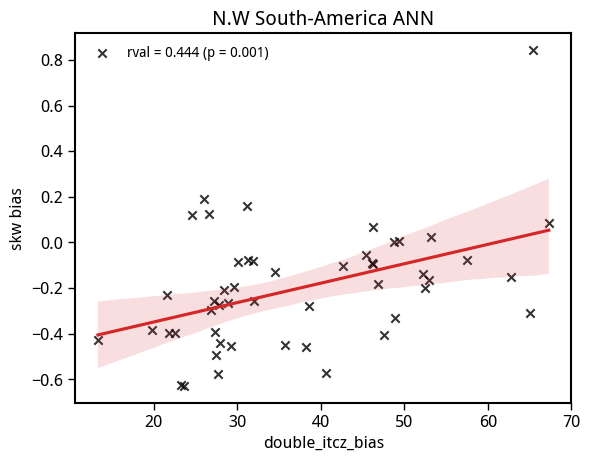

In [95]:
res = stats.pearsonr(itcz_metric.loc[itcz_metric['model'].isin(skw_bias_df.index)].double_itcz_bias, skw_bias_df.pr_skw)
sns.regplot(x=itcz_metric.loc[itcz_metric['model'].isin(skw_bias_df.index)].double_itcz_bias, y=skw_bias_df.pr_skw, color='k', marker='x', line_kws=dict(color='tab:red'), \
            label = f'rval = {round(res.statistic, 3)} (p = {round(res.pvalue, 3)})')
# plt.ylim(-1.1, 0.8)
# plt.xlim(-50, 8)
plt.ylabel('skw bias')
plt.title('N.W South-America ANN')
plt.legend(frameon=False, fontsize=10)
# plt.savefig('./images/review_extra/double_itcz_bias_skw_nwsa_ann.png', dpi=300, bbox_inches='tight')

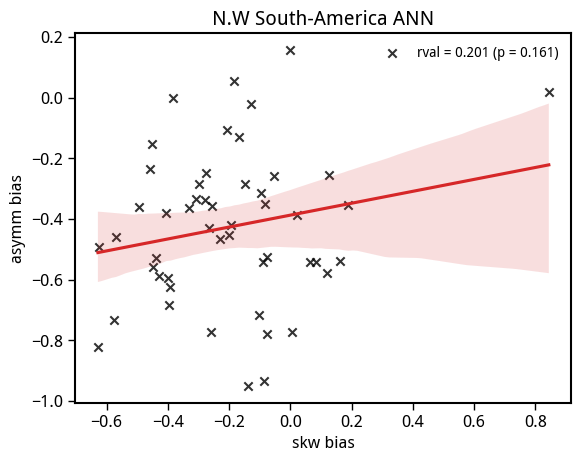

In [96]:
res = stats.pearsonr(skw_bias_df.pr_skw, asymm_bias_df.asymm)
# sns.regplot(x=itcz_metric.loc[itcz_metric['model'].isin(asymm_bias_df.index)].double_itcz_bias, y=asymm_bias_df.asymm, color='k', marker='x')
sns.regplot(x=skw_bias_df.pr_skw, y=asymm_bias_df.asymm, color='k', marker='x', line_kws=dict(color='tab:red'), \
            label = f'rval = {round(res.statistic, 3)} (p = {round(res.pvalue, 3)})')
# plt.ylim(-1.1, 0.8)
# plt.xlim(-50, 8)
plt.ylabel('asymm bias')
plt.xlabel('skw bias')
plt.title('N.W South-America ANN')
plt.legend(frameon=False, fontsize=10)
# plt.savefig('./images/review_extra/skw_asymm_naus_ann.png', dpi=300, bbox_inches='tight')

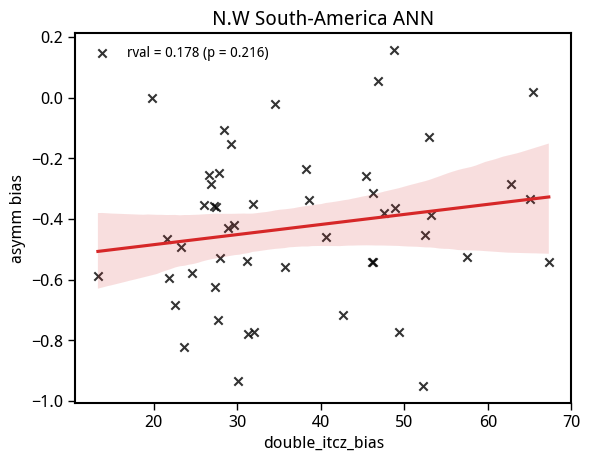

In [97]:
res = stats.pearsonr(itcz_metric.loc[itcz_metric['model'].isin(asymm_bias_df.index)].double_itcz_bias, asymm_bias_df.asymm)
sns.regplot(x=itcz_metric.loc[itcz_metric['model'].isin(asymm_bias_df.index)].double_itcz_bias, y=asymm_bias_df.asymm, color='k', marker='x', line_kws=dict(color='tab:red'), \
            label = f'rval = {round(res.statistic, 3)} (p = {round(res.pvalue, 3)})')
# plt.ylim(-1.1, 0.8)
# plt.xlim(-50, 8)
plt.ylabel('asymm bias')
plt.title('N.W South-America ANN')
plt.legend(frameon=False, fontsize=10)
# plt.savefig('./images/review_extra/double_itcz_bias_asymm_nwsa_ann.png', dpi=300, bbox_inches='tight')

In [270]:
skw_bias = np.abs(skw_res.isel(model = slice(0, -2)) - skw_res.isel(model = -2))
skw_bias

<xarray.Dataset>
Dimensions:  (model: 50, region: 46, season: 5)
Coordinates:
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
  * region   (region) object 'Greenland/Iceland' ... 'W.Antarctica'
  * season   (season) object 'ANN' 'DJF' 'MAM' 'JJA' 'SON'
Data variables:
    pr_skw   (model, region, season) float64 0.9348 0.2129 0.6051 ... nan nan
    n34_skw  (model, region, season) float64 0.03805 0.3134 ... 0.04185 0.3476

<AxesSubplot:xlabel='season', ylabel='model'>

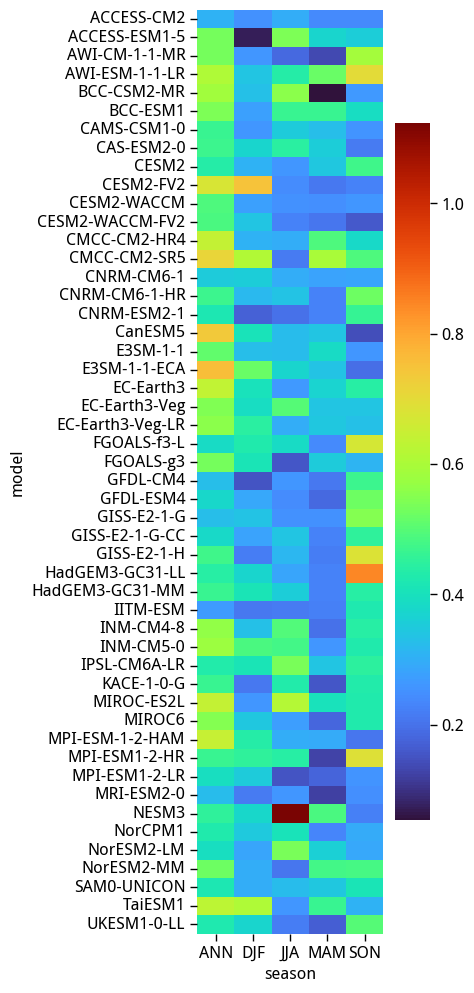

In [285]:
plt.figure(figsize=(3,12))
sns.heatmap(skw_bias.isel(region=slice(37, 42)).mean('region').to_dataframe().pivot_table(values='pr_skw', index='model', columns='season'), cmap='turbo')